In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = None
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 4

### Load the data

In [2]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [3]:
data = pd.read_csv("./data/LoanStats3c.csv", header=1, parse_dates=date_cols, infer_datetime_format=True)

In [4]:
data.shape

(235631, 111)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235631 entries, 0 to 235630
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: datetime64[ns](5), float64(86), object(20)
memory usage: 199.5+ MB


In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,38098114,40860827.0,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,2014-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,1994-08-01,0.0,NaN,NaN,6.0,0.0,138008.0,29%,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,2016-06-01,12017.81,NaT,2016-06-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0
1,36805548,39558264.0,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,2014-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,1989-09-01,2.0,42.0,NaN,17.0,0.0,6133.0,31.6%,36.0,w,5759.00,5759.00,5448.26,5448.26,4641.00,807.26,0.0,0.00,0.0000,2016-06-01,321.08,2016-07-01,2016-06-01,0.0,59.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0
2,37612354,40375473.0,12800.0,12800.0,12800.0,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000.0,Verified,2014-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,car,Car financing,953xx,CA,8.31,1.0,2000-10-01,0.0,17.0,NaN,8.0,0.0,5753.0,100.9%,13.0,w,10199.13,10199.13,5393.89,5393.89,2600.87,2793.02,0.0,0.00,0.0000,2016-06-01,319.08,2016-07-01,2016-06-01,0.0,36.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,261815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.0,NaN,NaN,NaN,2.0,32727.0,0.0,103.2,0.0,0.0,16.0,170.0,21.0,16.0,5.0,21.0,17.0,1.0,17.0,1.0,3.0,5.0,3.0,5.0,1.0,5.0,7.0,5.0,8.0,0.0,0.0,0.0,0.0,76.9,100.0,0.0,0.0,368700.0,18007.0,4400.0,18000.0
3,37662224,40425321.0,7650.0,7650.0,7650.0,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000.0,Source Verified,2014-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,850xx,AZ,34.81,0.0,2002-08-01,1.0,Na

## Data sampling

In [7]:
# sample 2% of total data for exploratory data analysis
np.random.seed(1234)
random_idx = np.random.choice(data.index.values, len(data)/10, replace=False)
sample_data = data.iloc[random_idx]
sample_data.shape

(23563, 111)

In [8]:
sample_data[sample_data.columns - ['id', 'member_id', 'loan_status']].apply(lambda col : len(col.unique()))

acc_now_delinq                    3
acc_open_past_24mths             27
addr_state                       46
all_util                          1
annual_inc                     2910
annual_inc_joint                  1
application_type                  1
avg_cur_bal                   15479
bc_open_to_buy                12339
bc_util                        1092
chargeoff_within_12_mths          7
collection_recovery_fee        1093
collections_12_mths_ex_med        4
delinq_2yrs                      15
delinq_amnt                      82
desc                           1545
dti                            3599
dti_joint                         1
earliest_cr_line                552
emp_length                       12
emp_title                     11442
funded_amnt                    1081
funded_amnt_inv                1165
grade                             7
home_ownership                    4
il_util                           1
initial_list_status               2
inq_fi                      

## Data Preprocessing

__Define the label__

In [9]:
sample_data.loan_status.value_counts()

Current               13361
Fully Paid             7374
Charged Off            2113
Late (31-120 days)      397
In Grace Period         244
Late (16-30 days)        67
Default                   7
Name: loan_status, dtype: int64

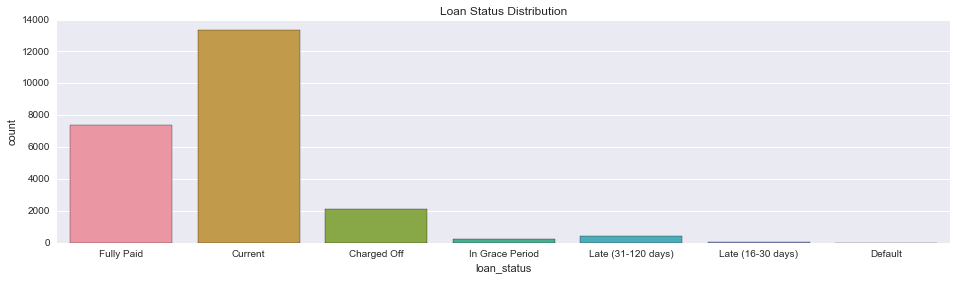

In [10]:
sns.countplot(sample_data.loan_status)
sns.plt.title('Loan Status Distribution')

In [11]:
sample_data.loan_status.value_counts().max() / float(sample_data.loan_status.value_counts().sum()) * 100.0

56.703306030641265

__Remove 'Current' loans__

In [12]:
sample_data = sample_data[sample_data.loan_status != 'Current']

__Transform the label into 'Charged Off' or not__

In [13]:
sample_data['loan_status'][sample_data.loan_status != 'Charged Off'] = 'Paid'

In [14]:
# remove indexing features of id and member_id
# remove url, the same for all
sample_data = sample_data.drop(['id', 'member_id', 'url'], axis=1)

__Transform term into numeric ie. "60 months" => 60__

In [17]:
sample_data.term = pd.to_numeric(sample_data.term.str[:3])
sample_data.term.value_counts()

36    7459
60    2743
Name: term, dtype: int64

__Transform int rate into numeric ie. "12.39%" => 12.39__

In [18]:
sample_data.int_rate = pd.to_numeric(sample_data.int_rate.str[:-1])
sample_data.int_rate.value_counts()

12.99    534
10.99    477
15.61    477
13.98    421
12.49    405
17.57    338
14.99    327
14.49    306
11.67    285
13.35    280
16.99    267
16.29    256
11.99    246
10.15    241
9.17     218
6.03     214
7.69     202
8.39     198
9.67     173
18.24    163
14.64    160
14.16    160
8.90     155
18.99    151
18.25    150
7.90     147
13.65    142
19.52    141
6.49     135
15.31    129
        ... 
13.66     51
9.49      51
8.67      46
21.18     45
15.99     44
21.99     43
17.14     37
17.86     36
25.57     35
7.49      33
18.54     33
19.97     32
25.80     31
22.45     31
25.83     30
16.49     29
20.50     27
19.24     27
19.22     23
6.99      21
23.40     20
26.06     17
22.40     16
22.90     14
25.89     12
21.48     11
22.99     10
23.99      9
23.70      8
25.99      7
Name: int_rate, dtype: int64

__Transform emp_length into numeric ie. "10+ years" => 10.0__

In [19]:
sample_data.emp_length = sample_data.emp_length.str.extract("(\d+)", expand=False).map(float)
sample_data.emp_length.value_counts()

10.0    3361
1.0     1411
2.0      907
3.0      824
7.0      590
5.0      572
4.0      565
6.0      543
8.0      527
9.0      413
Name: emp_length, dtype: int64

__Transform revol_util into numeric ie. "29%" => 29__

In [20]:
sample_data.revol_util = pd.to_numeric(sample_data.revol_util.str[:-1])
sample_data.revol_util.head()

189650    12.1
6568      28.4
210393    49.0
160674    38.6
222207    51.5
Name: revol_util, dtype: float64

__Split zipcode's first three digits ie. "123XXX => 123"__

In [21]:
sample_data.zip_code = sample_data.zip_code.str[:3]

__Fillna categorical features__

In [22]:
pd.isnull(sample_data[sample_data.dtypes[sample_data.dtypes == 'object'].index]).sum()

grade                     0
sub_grade                 0
emp_title               537
home_ownership            0
verification_status       0
loan_status               0
pymnt_plan                0
desc                   9356
purpose                   0
title                     0
zip_code                  0
addr_state                0
initial_list_status       0
application_type          0
dtype: int64

In [23]:
sample_data.fillna('', inplace=True)

__Check the cardinality of features__

In [24]:
sample_data[sample_data.dtypes[sample_data.dtypes == 'object'].index].describe()

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_tl_120dpd_2m,percent_bc_gt_75
count,10202,10202,10202,10202.0,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202.0,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202.0,10202,10202,10202.0,10202,10202.0,10202,10202.0,10202.0
unique,7,35,5764,11.0,4,3,12,2,1,847,12,171,761,46,489,88,117,1024.0,2,30,3,29,107,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6966.0,1056,332,199.0,91,26.0,90,3.0,84.0
top,C,C3,,10.0,MORTGAGE,Source Verified,2014-10-01 00:00:00,Paid,n,,debt_consolidation,Debt consolidation,945,CA,2000-09-01 00:00:00,,,56.0,w,2016-03-01 00:00:00,,2016-06-01 00:00:00,,INDIVIDUAL,,,,,,,,,,,,,,,,,,0.0,,,2.0,,1.0,,0.0,100.0
freq,2900,608,537,3361.0,5198,4090,1408,8089,10202,9356,6333,6221,102,1578,88,5046,8218,32.0,5169,600,9487,5081,7210,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,10202,217.0,112,306,540.0,7522,1141.0,6561,9796.0,2034.0


In [25]:
# application_type has only one value for all datapoints, remove it
sample_data.drop('application_type', axis=1, inplace=True)

__Check numeric features__

In [26]:
float_cols = sample_data.dtypes[sample_data.dtypes == 'float64']
print sample_data[float_cols.index].head()

        loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
189650     6000.0       6000.0           6000.0      7.90       187.75   
6568      10850.0      10850.0          10850.0     17.14       387.59   
210393    10000.0      10000.0          10000.0     13.65       340.08   
160674     8975.0       8975.0           8975.0     14.49       308.89   
222207     8050.0       8050.0           8050.0     16.24       283.97   

        annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
189650     46000.0  14.14          0.0             3.0      12.0      0.0   
6568       40000.0  29.91          0.0             1.0      11.0      0.0   
210393     56000.0  11.79          0.0             2.0       5.0      0.0   
160674    110000.0  11.12          0.0             1.0      17.0      1.0   
222207     55000.0  23.24          0.0             1.0       9.0      0.0   

        revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
189650     5190.0    

__Remove post-decison features__

In [27]:
post = ['funded_amnt', 'funded_amnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']

In [28]:
sample_data.drop(post, axis=1, inplace=True)

- Check the NaNs along the float64 features

In [29]:
float_cols = sample_data.dtypes[sample_data.dtypes == 'float64']
float_nulls = pd.isnull(sample_data[float_cols.index]).sum()
print "Before removing NaNs"
print float_nulls

Before removing NaNs
loan_amnt                     0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
acc_open_past_24mths          0
avg_cur_bal                   0
chargeoff_within_12_mths      0
delinq_amnt                   0
mo_sin_old_rev_tl_op          0
mo_sin_rcnt_rev_tl_op         0
mo_sin_rcnt_tl                0
mort_acc                      0
num_accts_ever_120_pd         0
num_actv_bc_tl                0
num_actv_rev_tl               0
num_bc_sats        

If we check the meaning of above features, imputing NaNs as 0 could be the best choice

- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- mths_since_last_delinq: The number of months since the borrower's last delinquency.
- mths_since_last_record: The number of months since the last public record.
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- mths_since_last_major_derog: Months since most recent 90-day or worse rating
- avg_cur_bal: Average current balance of all accounts
- bc_open_to_buy: Total open to buy on revolving bankcards.
- bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- mo_sin_old_il_acct: Months since oldest bank installment account opened
- mths_since_recent_bc: Months since most recent bankcard account opened.
- mths_since_recent_bc_dlq:Months since most recent bankcard delinquency
- mths_since_recent_inq: Months since most recent inquiry.
- mths_since_recent_revol_delinq: Months since most recent revolving delinquency.
- num_tl_120dpd_2m: Number of accounts currently 120 days past due (updated in past 2 months)
- percent_bc_gt_75: Percentage of all bankcard accounts > 75% of limit.

In [30]:
# Imputing NaNs into 0
sample_data[float_nulls[float_nulls > 0].index] = sample_data[float_nulls[float_nulls > 0].index].fillna(0)

- Check the variance of numeric features

In [31]:
float_cols = sample_data[sample_data.dtypes[sample_data.dtypes == 'float64'].index]

In [32]:
float_cols.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.0,10202.000000,10202.000000,1.020200e+04,1.020200e+04,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,1.020200e+04,1.020200e+04,10202.000000,1.020200e+04
mean,14527.543619,14.150578,442.462208,74671.470547,17.655806,0.324250,0.858557,11.657910,0.235542,15628.988532,26.577240,675.918738,675.733758,0.013037,1.0,0.005293,249.878847,1.381569e+05,2.999679e+04,4.787101,13281.767791,0.013625,4.730641,179.810429,11.949030,7.304156,1.898255,0.517448,3.609978,5.704666,4.650853,8.742894,8.810331,8.270241,15.581749,5.655754,11.598412,0.003431,0.092825,2.201039,94.490855,0.157224,0.046756,1.677003e+05,4.755243e+04,19424.800333,3.948715e+04
std,8368.796486,4.406231,248.216111,46673.990552,8.000096,0.851104,1.093999,5.264871,0.560696,19793.649055,12.067027,3001.715136,3000.965239,0.120152,0.0,0.073903,1876.088880,1.505631e+05,3.172570e+04,2.957126,15502.644954,0.155009,195.989279,88.740034,14.832038,7.718996,2.178542,1.262886,2.134785,3.089381,2.755151,4.912893,7.487571,4.248551,8.098830,3.070856,5.267249,0.060128,0.471426,1.674956,8.094285,0.404103,0.314767,1.675207e+05,4.503825e+04,19701.249043,4.117158e+04
min,1000.000000,6.030000,30.710000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,3.000000e+02,0.000000e+00,0.000000,0.000000e+00
25%,8000.000000,10.990000,264.460000,46000.000000,11.640000,0.000000,0.000000,8.000000,0.000000,5979.500000,18.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.985300e+04,1.300000e+04,3.000000,3151.000000,0.000000,0.000000,117.000000,3.000000,3.000000,0.000000,0.000000,2.000000,4.000000,3.000000,5.000000,4.000000,5.000000,10.000000,4.000000,8.000000,0.000000,0.000000,1.000000,91.700000,0.000000,0.000000,4.778200e+04,2.072775e+04,6800.000000,1.393400e+04
50%,12500.000000,13.980000,382.550000,65000.000000,17.230000,0.000000,1.000000,11.000000,0.000000,10997.500000,25.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,8.071750e+04,2.200000e+04,4.000000,7460.500000,0.000000,0.000000,164.000000,7.000000,5.000000,1.000000,0.000000,3.000000,5.000000,4.000000,8.000000,7.000000,7.000000,14.000000,5.000000,11.000000,0.000000,0.000000,2.000000,97.800000,0.000000,0.000000,1.099340e+05,3.657150e+04,13200.000000,3.040950e+04
75%,20000.000000,16.990000,576.290000,90000.000000,23.420000,0.000000,1.000000,14.000000,0.000000,19423.000000,34.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.065935e+05,3.750000e+04,6.000000,18731.000000,0.000000,0.000000,227.000000,14.000000,9.000000,3.000000,0.000000,5.000000,7.000000,6.000000,11.000000,12.000000,10.000000,20.000000,7.0000

In [33]:
# policy_code has the std of 0, its values are all the same
# It's safe to remove both of them
sample_data.drop('policy_code', axis=1, inplace=True)

In [34]:
sample_data.shape

(10202, 96)

__Check the datatime features__

In [35]:
datetime_cols = sample_data[sample_data.dtypes[sample_data.dtypes == 'datetime64[ns]'].index]

In [36]:
# check the NaT
datetime_nulls = pd.isnull(datetime_cols).sum()
print datetime_nulls

Series([], dtype: float64)


In [37]:
# Intuitively, let's check if payment dates are related to loan_status
datetime_nulls_cols = datetime_nulls.index.values
datetime_nulls_cols = np.append(datetime_nulls_cols, 'loan_status')
sample_data[datetime_nulls_cols].head()
# We can find if nex_payment_d == 'NaT', the loan_status is all about not 'Current' status, which makes sense.

,loan_status
189650,Paid
6568,Paid
210393,Paid
160674,Paid
222207,Charged Off


In [38]:
# last_pymnt_d: Last month payment was received
# next_pymnt_d: Next scheduled payment date
# last_credit_pull_d: The most recent month LC pulled credit for this loan

- payment dates and loan_status are the same thing with different representations, just keep one loan_status
- last_credit_pull_d is also related with loan_status and last_pymnt_d
- Most importantly, all dates including issue_date are meaningless to predict loan_status, it's impossible to known the final dates to give a status.

In [39]:
# create a new feature credit length
sample_data['cr_len'] = (sample_data.issue_d.dt.date - sample_data.earliest_cr_line.dt.date).dt.days

In [40]:
# post-feature, drop all payment dates, but we keep issue_d to split the train and test data
sample_data.drop(['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line'], axis=1, inplace=True)

### charged off rates along months

In [99]:
sample_date = sample_data[['issue_d', 'loan_status']]

In [100]:
sample_date = pd.concat([sample_date.groupby(['issue_d']).count(), sample_date[sample_date['loan_status'] == 'Charged Off'].groupby(['issue_d']).count()], axis=1, ignore_index=True)

In [101]:
sample_date.columns = ['total', 'charged_off']

In [102]:
sample_date['rates'] = sample_date['charged_off'] / sample_date['total']

In [104]:
print sample_date['rates']

issue_d
2014-01-01    0.197674
2014-02-01    0.199011
2014-03-01    0.236597
2014-04-01    0.214831
2014-05-01    0.206473
2014-06-01    0.213245
2014-07-01    0.205303
2014-08-01    0.196850
2014-09-01    0.205882
2014-10-01    0.194602
2014-11-01    0.213497
2014-12-01    0.211111
Freq: MS, Name: rates, dtype: float64


## Data Visualization

In [41]:
sample_data.dtypes.value_counts()

float64    46
object     45
int64       2
dtype: int64

In [51]:
# subgrade plot
order = []
for grade in ['A','B','C','D','E','F','G']:
    for i in xrange(1, 6):
        order.append(grade + str(i))
print order

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


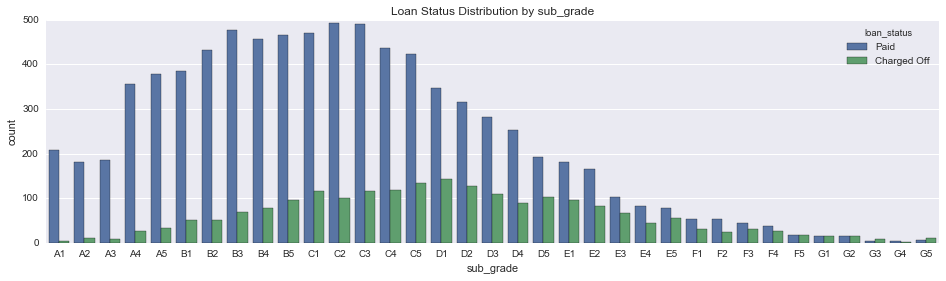

In [52]:
sns.countplot(x='sub_grade', hue="loan_status", data=sample_data, order=order)
sns.plt.title('Loan Status Distribution by sub_grade')

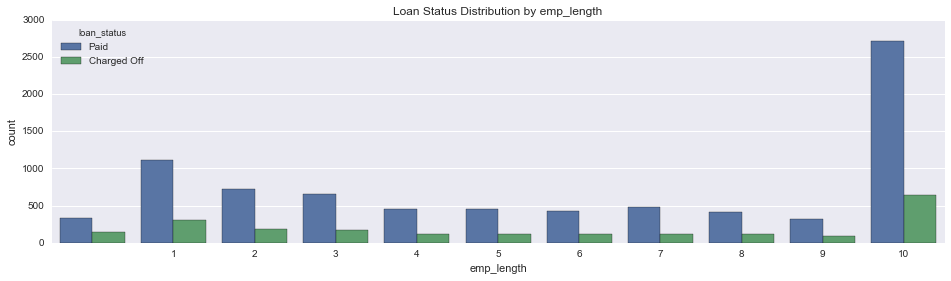

In [59]:
# employment length
sns.countplot(x='emp_length', hue="loan_status", data=sample_data, order=[''] + range(1,11))
sns.plt.title('Loan Status Distribution by emp_length')

In [53]:
def plot_cgr(cgr_data, cols):
    """function to barplot the categorical features by 'loan status'
    """
    plt.figure(figsize=(16, 4*len(cols)))
    for idx, col in enumerate(cols):
        idx = idx + 1
        ax = plt.subplot(len(cols),1,idx)
        sns.countplot(x=col, hue="loan_status", data=cgr_data, ax=ax)
        plt.legend(loc = 1)
        ax.set_title('Loan Status Distribution by {}'.format(col))
    plt.tight_layout()
    plt.show()
    plt.close()

In [54]:
dummy_list = ["emp_length", "verification_status", "delinq_2yrs", "addr_state", 'home_ownership', 
              "grade", "sub_grade", "open_acc"]

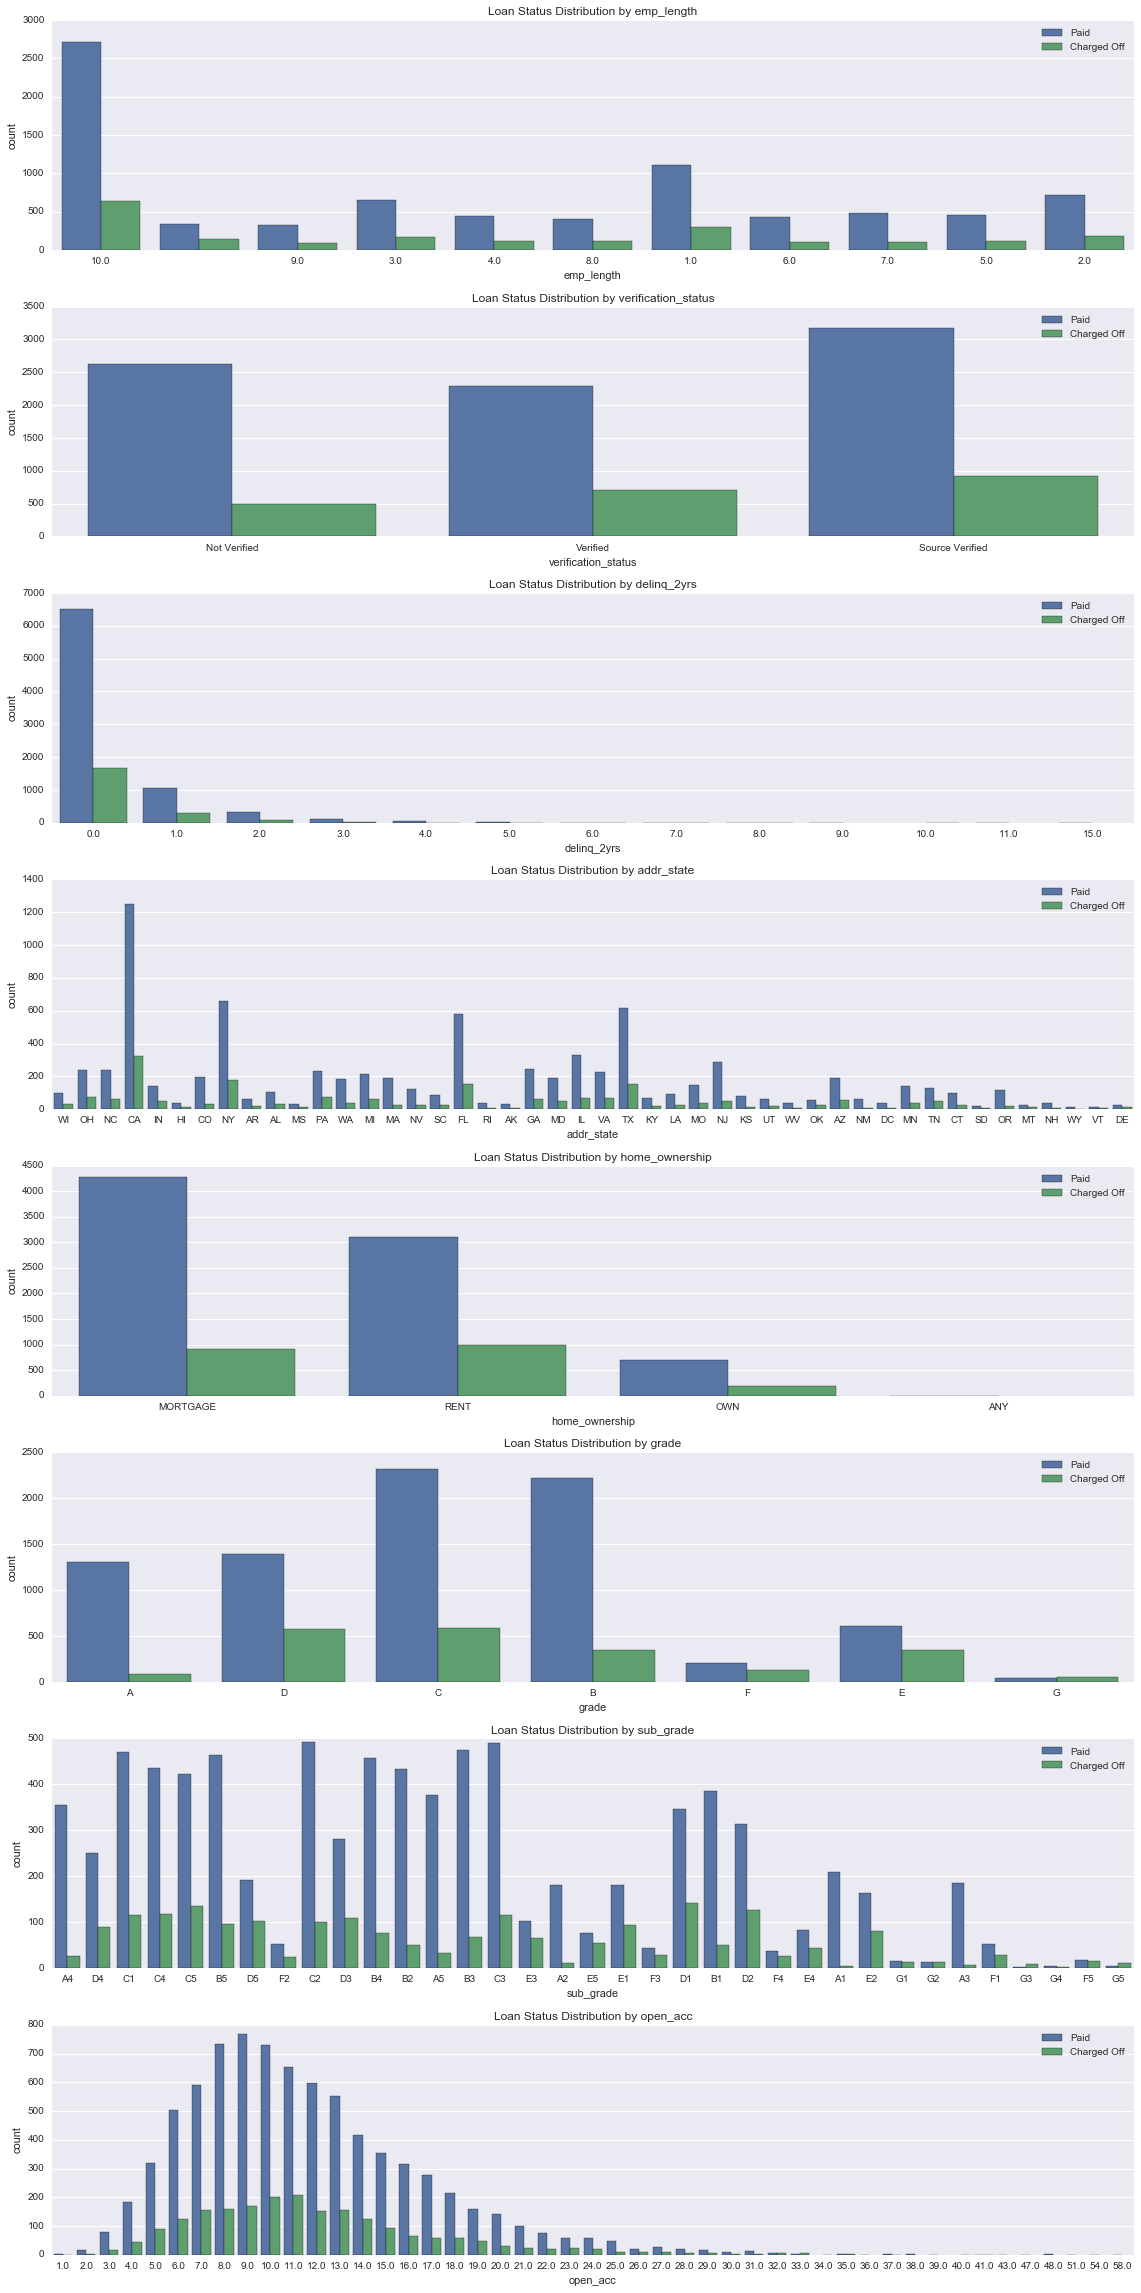

In [55]:
plot_cgr(sample_data, dummy_list)

In [45]:
def plot_cont(cont_data, cols):
    """function to histplot continuous by 'loan status'
    """
    plt.figure(figsize=(16, 4*len(cols)))
    for idx, col in enumerate(cols):
        idx = idx + 1
        ax = plt.subplot(len(cols),1,idx)
        
        sns.distplot(cont_data[col][cont_data['loan_status'] == 'Charged Off'], ax=ax)
        sns.distplot(cont_data[col][cont_data['loan_status'] == 'Paid'], ax=ax)
        sns.plt.legend(['Charged Off', 'Paid'], loc=0)
        
#         plt.legend(loc = 0)
        ax.set_title('{} Histogram by Loan Status'.format(col))
    plt.tight_layout()
    plt.show()
    plt.close()

In [274]:
cont_list = sample_data.dtypes[sample_data.dtypes != 'object'].index

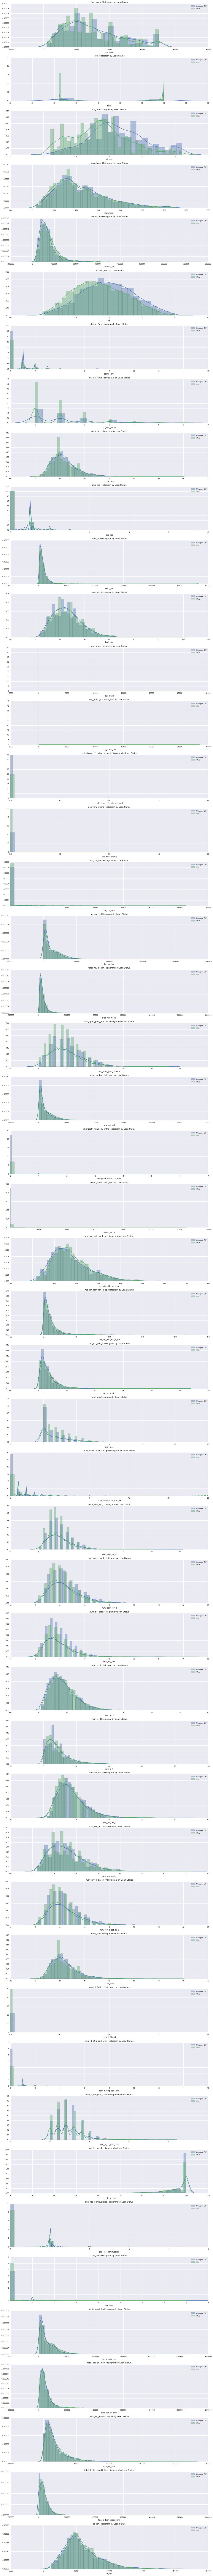

In [277]:
plot_cont(sample_data, cont_list)